# EAD - Análise Exploratória de Dados
### Pós Graduação em Inteligência Artificial e Aprendizado de Máquina / PUC MINAS

Professor Leandro Figueira Lessa

Felipe Bochoski da Cruz - 1633227@sga.pucminas.br

Khalil Omar Salha - 1632515@sga.pucminas.br

Pedro Augusto de Morais - 1633121@sga.pucminas.br

Tuerê Pinto - 1453566@sga.pucminas.br

<br>
Turma: 2º Semestre 2025

----

# Título: Análise do Desenvolvimento Humano e Econômico Global com Base no Dataset Gapminder

# 1. Introdução

Este projeto  tem como objetivo realizar no mínimo 15 análises de dados, utilizando
visualizações, tabelas e representações gráficas para investigar o desenvolvimento humano
e econômico ao redor do mundo. As análises devem ser feitas com base no dataset
Gapminder, que contempla dados históricos, cujo objetivo é obter uma visão abrangente sobre padrões globais de crescimento, desigualdade, evolução populacional e qualidade de vida de países ao redor do mundo.

Ele será realizado em 5 etapas:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Introdução<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Coleta, Limpeza e Análise Exploratória (AED)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Funções de Visualização e Análise Gráfica<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Interpretação das Visualizações<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. Síntese dos Principais Insights<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. Conclusão e Reflexão<br>

----



# 2. Coleta, Limpeza e Análise Exploratória (AED)
Os dados utilizados neste projeto são provenientes do Gapminder, uma organização sem fins lucrativos que disponibiliza dados estatísticos sobre desenvolvimento global. O dataset inclui informações sobre expectativa de vida, PIB per capita e população de diversos países ao longo do tempo.

### Importação das bibliotecas necessárias no projeto

In [196]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd



### Funções para Coleta de Dados

In [197]:
def read_gapminder_data(path):
    file_path = path
    try:
        data = pd.read_csv(file_path, sep=',', encoding='utf-8')
        print(f"Arquivo {file_path} lido com sucesso.")
        return data
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo: {e}")
        return None

### Funções para limpeza de dados

In [198]:
def data_processing_clear(dataframe):
    try:
        print("Valores ausentes por coluna:")
        print(dataframe.isnull().sum())
        print(f"\nTotal de linhas com valores ausentes: {dataframe.isnull().any(axis=1).sum()}")
        cleaned_data = dataframe.dropna()
        print("Linhas com valores ausentes removidas com sucesso.")
        return cleaned_data
    except Exception as e:
        print(f"Ocorreu um erro ao processar os dados: {e}")
        return dataframe   

def data_processing_clear_duplicates(dataframe):
    try:
        total_duplicates = dataframe.duplicated().sum()
        duplicates_by_country_year = dataframe.duplicated(subset=['country', 'year']).sum()
        print(f"Total de linhas duplicadas: {total_duplicates}")
        print(f"Duplicatas por país e ano: {duplicates_by_country_year}")
        
        cleaned_data = dataframe.drop_duplicates()
        print("Linhas duplicadas removidas com sucesso.")
        return cleaned_data
    except Exception as e:
        print(f"Ocorreu um erro ao processar os dados: {e}")
        return dataframe

### Funções para Plotagem de Gráficos

In [199]:
def plot_line_chart(group,  
                    title = "Title",
                    xLabel = "xLabel", 
                    yLabel = "yLabel", 
                    showGrid = True, 
                    marker='o',
                    xSize=10,
                    ySize=5):
    
    figsize=(xSize,ySize)
    plt.figure(figsize=figsize)
    for cont in group.columns:
        plt.plot(group.index, group[cont], label=cont, marker=marker)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()
    plt.grid(showGrid)
    plt.show()

def plot_scatter_chart (xData, 
                        yData, 
                        title = "Title", 
                        xLabel = "xLabel", 
                        yLabel = "yLabel", 
                        showGrid = True):
    plt.figure(figsize=(10, 6))
    plt.scatter(xData, yData, alpha=0.6)
    plt.title(title)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.grid(showGrid)
    plt.show()

def scatter_subplots(df, 
                     dfPrincipalFieldName,  
                     dfXColFieldName,
                     dfYColFieldName,
                     nRows, 
                     nCols, 
                     dataToAnalyze, 
                     xLabel='lifeExp', 
                     yLabel='gdpPercap', 
                     cores=None, 
                     titulo_geral=None):
    fig, axs = plt.subplots(nRows, nCols, figsize=(14,10), constrained_layout=True)
    axs = axs.flatten()  # transformar em array 1D para fácil iteração

    if cores is None:
        cores = plt.cm.tab10.colors
    
    for i, value in enumerate(dataToAnalyze):
        color = cores[i % len(cores)]
        sub_df = df[df[dfPrincipalFieldName] == value]
        axs[i].scatter(sub_df[dfXColFieldName], sub_df[dfYColFieldName], alpha=0.6, color=color)
        axs[i].set_title(value)
        axs[i].set_xlabel(xLabel)
        axs[i].set_ylabel(yLabel)
        axs[i].grid(True)

    if titulo_geral:
        fig.suptitle(titulo_geral, fontsize=16)
    
    plt.show()


### Leitura do arquivo da análise

In [200]:
df = read_gapminder_data('../datasets/gapminder_full.csv')

Arquivo ../datasets/gapminder_full.csv lido com sucesso.


### Exibe os primeiros 10 registros contidos no arquivo CSV

In [201]:
df.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


### Limpeza dos Dados

Prepararando os dados ausentes, tratando inconsistências e identificando padrões iniciais

In [202]:
# Analisando valores ausentes no DataFrame
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print(f"\nTotal de linhas com valores ausentes: {df.isnull().any(axis=1).sum()}")

Valores ausentes por coluna:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Total de linhas com valores ausentes: 0


Remoção das linhas com valores ausentes

In [203]:
df = data_processing_clear(df)

Valores ausentes por coluna:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Total de linhas com valores ausentes: 0
Linhas com valores ausentes removidas com sucesso.


Prepararando os dados duplicados, tratando inconsistências e identificando padrões iniciais

In [204]:
# Analisar os dados duplicados
num_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {num_duplicados}")

Total de linhas duplicadas: 32


Visualizar os dados que estão duplicados

In [205]:
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

         country  year         pop continent  lifeExp     gdpPercap
9    Afghanistan  1997  22227415.0      Asia   41.763    635.341351
72   Afghanistan  1997  22227415.0      Asia   41.763    635.341351
120      Belgium  2007  10392226.0    Europe   79.441  33692.605080
140      Bolivia  1987   6156369.0  Americas   57.251   2753.691490
141      Bolivia  1992   6893451.0  Americas   59.957   2961.699694
..           ...   ...         ...       ...      ...           ...
644       Guinea  1952   2664249.0    Africa   33.609    510.196492
645       Guinea  1957   2876726.0    Africa   34.558    576.267025
646       Guinea  1962   3140003.0    Africa   35.753    686.373674
647       Guinea  1967   3451418.0    Africa   37.197    708.759541
648       Guinea  1972   3811387.0    Africa   38.842    741.666231

[64 rows x 6 columns]


Removendo registros duplicados

In [206]:
# Usando a função criada para limpar os dados duplicados
df = data_processing_clear_duplicates(df)

Total de linhas duplicadas: 32
Duplicatas por país e ano: 32
Linhas duplicadas removidas com sucesso.


In [207]:
# Novo arquivo de dataset limpo
df.to_csv('../datasets/gapminder_full_cleaned.csv', index=False)

In [208]:
# Leitura do novo arquivo limpo
df = read_gapminder_data('../datasets/gapminder_full_cleaned.csv')

Arquivo ../datasets/gapminder_full_cleaned.csv lido com sucesso.


### Analise Exploratória

In [209]:
df['year'].value_counts().sort_index()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

Insight Exploratório: Os dados estão disponíveis em intervalos de 5 anos, de 1952 a 2007.

In [210]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

Insight Exploratório: Africa é o continente com maior numero de paises representados.

In [211]:
print(f"Insight Exploratório: Expectativa de vida varia de {df['lifeExp'].min()}  a {df['lifeExp'].max()} anos")
print(f"Insight Exploratório: PIB Per Capita varia de  {df['gdpPercap'].min()}    a  {df['gdpPercap'].max()} dólares")
print(f"Insight Exploratório: Populacao varia de  {df['pop'].min()}    a  {df['pop'].max()} dólares")

Insight Exploratório: Expectativa de vida varia de 23.599  a 82.603 anos
Insight Exploratório: PIB Per Capita varia de  241.1658765    a  113523.1329 dólares
Insight Exploratório: Populacao varia de  60011.0    a  1318683096.0 dólares


### Visualizações Explorátorias

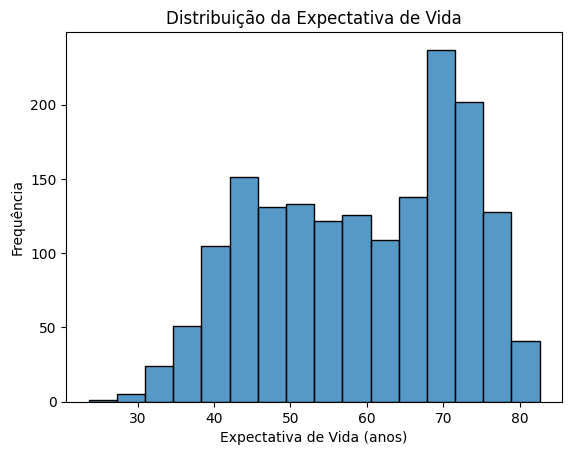

In [212]:
sns.histplot(df['lifeExp'])
plt.title('Distribuição da Expectativa de Vida')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Frequência')
plt.show()


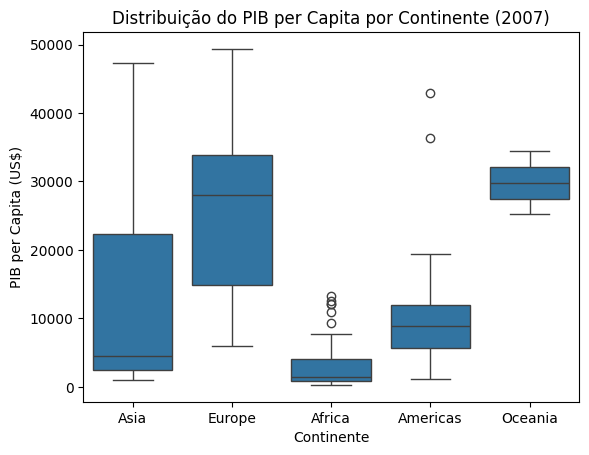

In [213]:
df_2007 = df[df['year'] == 2007]
sns.boxplot(data=df_2007, x='continent', y='gdpPercap')
plt.title('Distribuição do PIB per Capita por Continente (2007)')
plt.xlabel('Continente')
plt.ylabel('PIB per Capita (US$)')
plt.show()

In [214]:
life_expectancy_by_continent = df.groupby("continent")[["lifeExp", "gdpPercap"]].mean().reset_index()
life_expectancy_by_continent.columns = ["Continente", "Expectativa de Vida Média", "PIB per Capita Médio"]
print(life_expectancy_by_continent.sort_values(by="PIB per Capita Médio", ascending=False))

  Continente  Expectativa de Vida Média  PIB per Capita Médio
4    Oceania                  74.326208          18621.609223
3     Europe                  71.903686          14469.475533
2       Asia                  60.064903           7902.150428
1   Americas                  64.658737           7136.110356
0     Africa                  48.865330           2193.754578


In [215]:
df_pais_mais_lifeExp_2007 = df.where(df['year'] == 2007).sort_values(by='lifeExp', ascending=False).head(10)
df_pais_mais_lifeExp_2007

,country,year,pop,continent,lifeExp,gdpPercap
803,Japan,2007.0,127467972.0,Asia,82.603,31656.06806
671,Hong Kong China,2007.0,6980412.0,Asia,82.208,39724.97867
695,Iceland,2007.0,301931.0,Europe,81.757,36180.78919
1487,Switzerland,2007.0,7554661.0,Europe,81.701,37506.41907
71,Australia,2007.0,20434176.0,Oceania,81.235,34435.36744
1427,Spain,2007.0,40448191.0,Europe,80.941,28821.06370
1475,Sweden,2007.0,9031088.0,Europe,80.884,33859.74835
767,Israel,2007.0,6426679.0,Asia,80.745,25523.27710
539,France,2007.0,61083916.0,Europe,80.657,30470.01670
251,Canada,2007.0,33390141.0,Americas,80.653,36319.23501


In [216]:
df_pais_mais_lifeExp_2007 = df.where(df['year'] == 2007).sort_values(by='lifeExp', ascending=False).head(10)
px.bar(df_pais_mais_lifeExp_2007, x='country', y='lifeExp', title='Países com maior expectativa de vida em 2007')

In [217]:
df_pais_mais_populoso_2007 = df.where(df['year'] == 2007).sort_values(by='pop', ascending=False).head(10)
px.bar(df_pais_mais_populoso_2007, x='country', y='pop', title='Países Mais Populosos em 2007')

----

# 3. Funções de Visualização e Análise Gráfica

Esta seção utiliza funções de visualização e análise gráfica do dataset Gapminder para interpretar indicadores como expectativa de vida, PIB per capita e população, permitindo compreender padrões, relações e desigualdades no desenvolvimento humano e econômico global.

<h3><b> 1. Plotagem do Gráfico de Dispersão - Produto Interno Bruto Per Capita vs Expectativa de Vida Por Continente</b></h3>

Esta função gera um gráfico de dispersão com múltiplos painéis, comparando PIB per capita e expectativa de vida por continente em um ano específico.

<b>Tipo:</b> Gráfico de dispersão <br>
<b>Objetivo:</b> Mostrar a evolução da expectativa de vida média por continente ao longo do tempo. (1952 a 2007)<br>
<b>Justificativa:</b> Revela correlações entre riqueza, saude e desigualdade.<br>

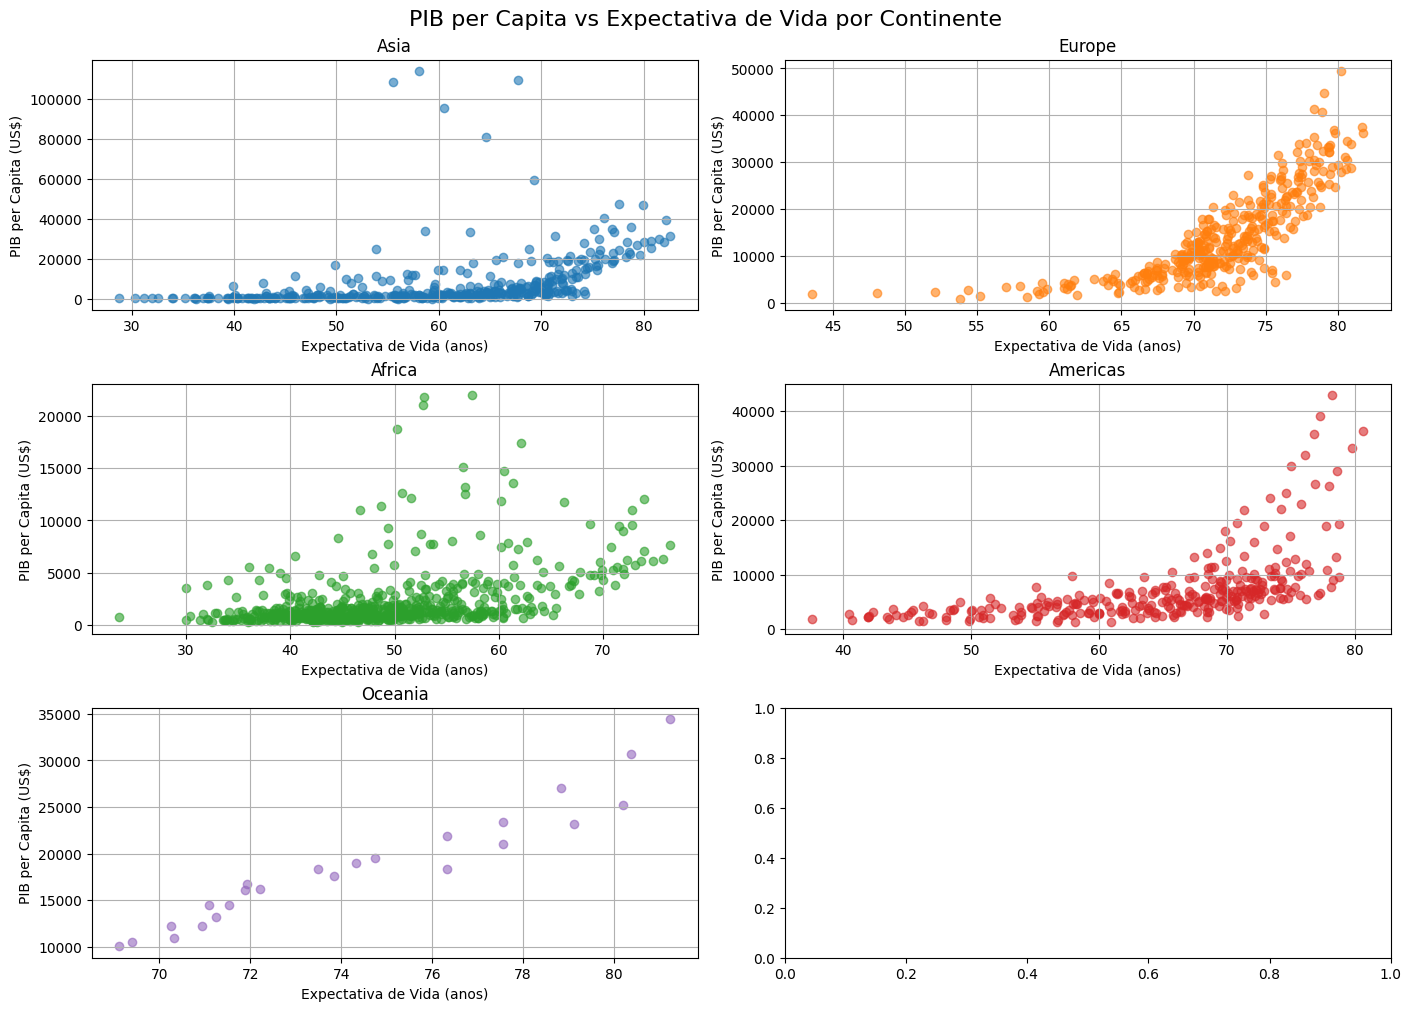

In [218]:
continentsList = df['continent'].unique().tolist()
nRows = len(continentsList) - (len(continentsList) // 2 ) 

scatter_subplots(df, 
                'continent', 
                dfXColFieldName='lifeExp', 
                dfYColFieldName='gdpPercap',
                nRows=nRows, 
                nCols=2, 
                dataToAnalyze=continentsList, 
                xLabel='Expectativa de Vida (anos)', 
                yLabel='PIB per Capita (US$)',
                titulo_geral="PIB per Capita vs Expectativa de Vida por Continente",
                )

<b>Interpretação: </b> Países com alto PIB tendem a ter maior expectativa de vida, mas há exceções principalmente no continente Africano.<br><br>




<h3><b>2 . Plotagem do Gráfico Linha: Comparação da expectativa de vida entre continentes</b></h3>

<b>Tipo:</b> Gráfico de Linha <br>
<b>Objetivo:</b> Mostrar a evolução da expectativa de vida média por continente ao longo do tempo. (1952 a 2007)<br>
<b>Justificativa:</b> Ideal para identificar tendências históricas e comparar o progresso de desenvolvimento.<br>

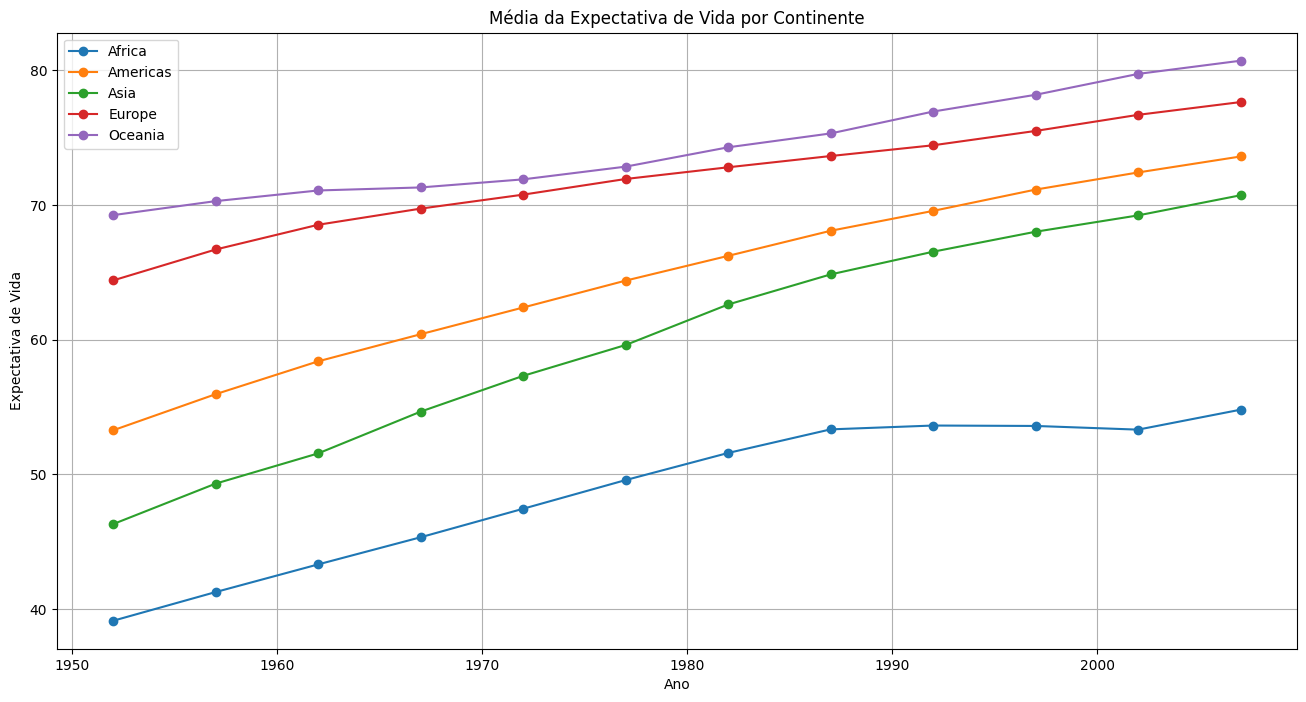

In [219]:

group = df.groupby(['year', 'continent'])['lifeExp'].mean().unstack()


plot_line_chart(group=group, 
                title = "Média da Expectativa de Vida por Continente", 
                xLabel = "Ano", 
                yLabel = "Expectativa de Vida",
                showGrid = True,
                marker='o',
                xSize=16,
                ySize=8
                )


<b>Interpretação: </b> Europa e Oceania mantêm os maiores índices; África cresce lentamente, refletindo desigualdades estruturais.<br><br>


<h3><b>3. Plotagem do Gráfico (Mapa de Calor): Expectativa de vida por continente por década</b></h3>

<b>Tipo:</b> Mapa de Calor <br>
<b>Objetivo:</b> Mostrar a evolução da expectativa de vida por continente e década.<br>
<b>Justificativa:</b> Visualização compacta que facilita comparações temporais e regionais..<br>

In [220]:
# Criar década a partir do ano (ex: 1952 -> 1950, 2007 -> 2000)
df['decade'] = (df['year'] // 10) * 10

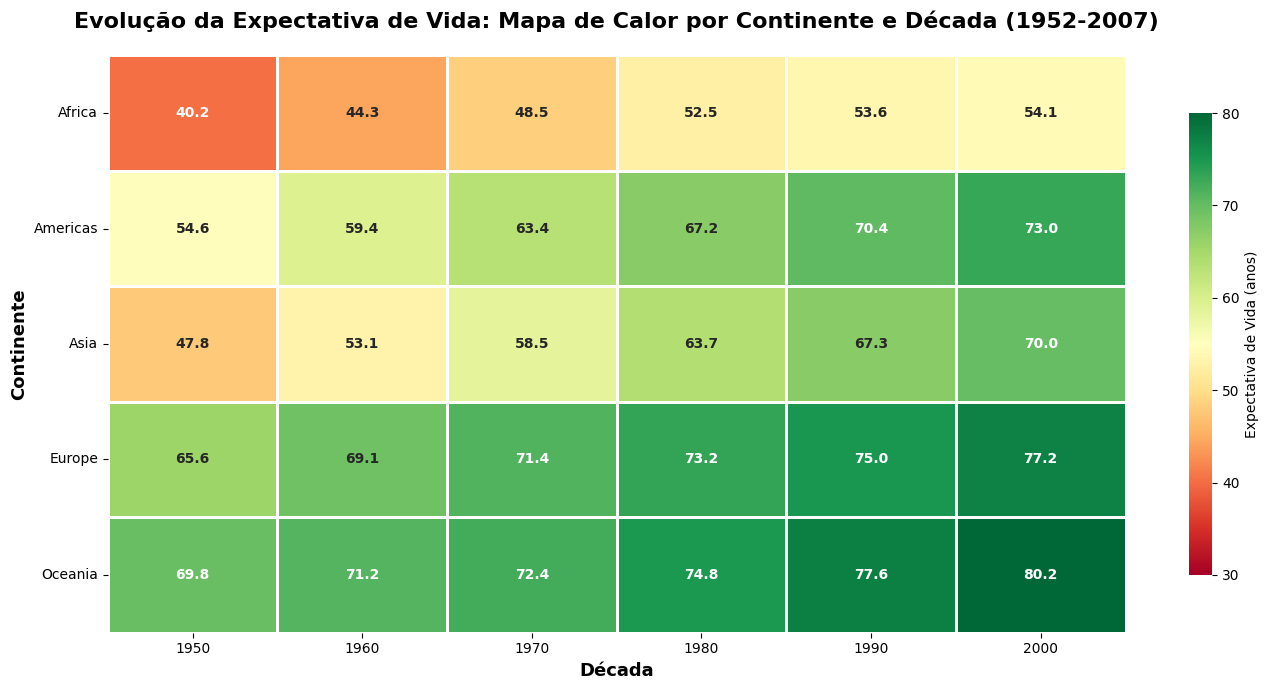

In [221]:
# Agrupar por continente e década, calculando a média da expectativa de vida
heatmap_data = df.groupby(['continent', 'decade'])['lifeExp'].mean().unstack()

plt.figure(figsize=(14, 7))

# Criar o heatmap com configurações avançadas
ax = sns.heatmap(heatmap_data, 
                 annot=True,
                 fmt='.1f',
                 cmap='RdYlGn',        # Vermelho-Amarelo-Verde (baixo-médio-alto)
                 linewidths=1,
                 linecolor='white',
                 cbar_kws={'label': 'Expectativa de Vida (anos)', 'shrink': 0.8},
                 vmin=30,              # Valor mínimo da escala
                 vmax=80,              # Valor máximo da escala
                 square=False,         # Células retangulares
                 annot_kws={'size': 10, 'weight': 'bold'})

# Configurações adicionais
plt.title('Evolução da Expectativa de Vida: Mapa de Calor por Continente e Década (1952-2007)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Década', fontsize=13, fontweight='bold')
plt.ylabel('Continente', fontsize=13, fontweight='bold')

# Rotacionar labels do eixo X
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

<b>Interpretação: </b>Expectativa de vida cresce em todos os continentes; África permanece abaixo das demais.<br><br>

<h3><b>4. Visualização Geográfica: Expectativa de Vida por Continente ao Longos do Anos </b><br></h3>

<b>Tipo:</b> Choropleth Map com Animação Temporal <br>
<b>Objetivo:</b> Permitir a visualização da evolução da expectativa de vida por continente ao longo dos anos de forma animada<br>
<b>Justificativa:</b> Permite comparações visuais rápidas entre países e continentes. Excelente para mostrar disparidades regionais e mudanças ao longo do tempo.<br>

In [222]:
fig = px.choropleth(px.data.gapminder(), 
                    locations="iso_alpha", 
                    color="lifeExp", 
                    hover_name="continent", 
                    animation_frame="year", 
                    range_color=[20 ,80], 
                    title="Animação: Expectativa de Vida por Continente ao Longo dos Anos",
                    width=1200,  
                    height=700)
fig.show()

<b>Interpretação: </b>Expectativa de vida cresce em todos os continentes; África permanece abaixo das demais.<br><br>

<h3><b>5. Plotagem do Gráfico (Scatter plot Multivariado): População Por Continente vs (Expectativa de Vida vs PIB Per Capita)</b></h3>

<b>Tipo:</b> Dispersão multivariado <br>
<b>Objetivo:</b> Comparar continentes com base em número de países, PIB médio e expectativa de vida.<br>
<b>Justificativa:</b> Permite visualizar múltiplos indicadores simultaneamente; destaca desigualdades regionais e padrões de desenvolvimento.<br>

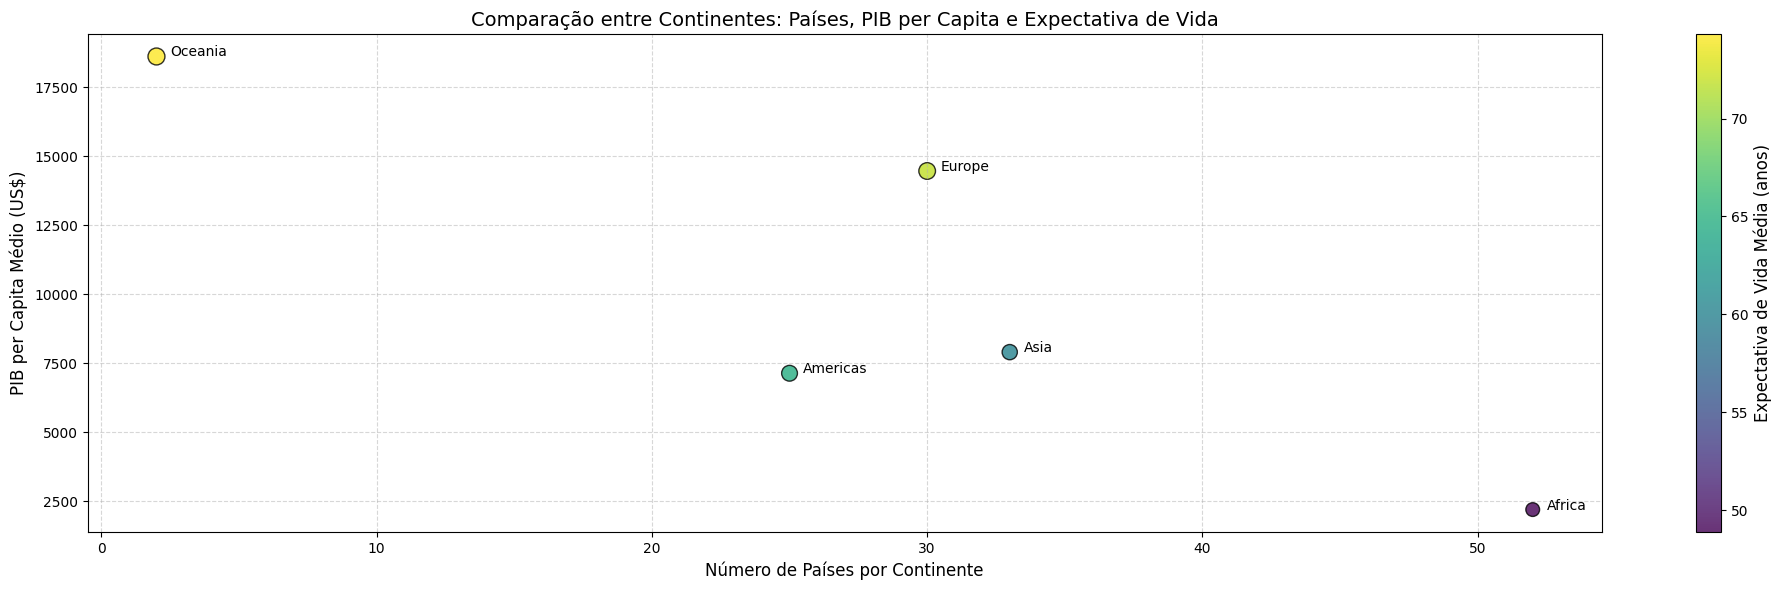

In [223]:
# Agrupar por país e continente, calcular médias de PIB per capita e expectativa de vida
country_stats = df.groupby(['continent', 'country']).agg({
    'gdpPercap': 'mean',
    'lifeExp': 'mean'
}).reset_index()

# Agrupar por continente para obter médias gerais e número de países
continent_stats = country_stats.groupby('continent').agg({
    'country': 'count',
    'gdpPercap': 'mean',
    'lifeExp': 'mean'
}).rename(columns={'country': 'num_countries'}).reset_index()

# Plotar gráfico de dispersão
fig, ax = plt.subplots(figsize=(20, 6))

scatter = ax.scatter(
    continent_stats['num_countries'],
    continent_stats['gdpPercap'],
    s=continent_stats['lifeExp'] * 2,  
    c=continent_stats['lifeExp'],     
    cmap='viridis',
    alpha=0.8,
    edgecolors='black'
)

# Adicionar rótulos
for i, row in continent_stats.iterrows():
    ax.text(row['num_countries'] + 0.5, row['gdpPercap'], row['continent'], fontsize=10)

# Título e eixos
plt.title("Comparação entre Continentes: Países, PIB per Capita e Expectativa de Vida", fontsize=14)
plt.xlabel("Número de Países por Continente", fontsize=12)
plt.ylabel("PIB per Capita Médio (US$)", fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label("Expectativa de Vida Média (anos)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<b>Interpretação:</b> Europa e Oceania lideram em PIB e expectativa de vida; África tem maior número de países e menores índices. <br><br>



<h3><b>6. Scatter Geo com Animação: Paises Mais Populosos do Mundo</b></h3>

<b>Tipo:</b>Scatter Geo com Animação<br>
<b>Objetivo:</b> Permitir a visualização do aumento populacional dos paises ao longo dos anos (1952 a 2007).<br>
<b>Justificativa:</b>Ideal para mostrar crescimento populacional global de forma visual e interativa.<br>

In [224]:
fig = px.scatter_geo(
    px.data.gapminder(),
    locations="iso_alpha",        
    locationmode='ISO-3',               
    color="continent",
    hover_name="country",
    size="pop",
    animation_frame="year",
    projection="natural earth",
    title='População dos países de 1952-2007',
    width=1200,  
    height=700   
)

fig.show()



<h3><b>7. Evolução da expectativa de vida no Brasil</b></h3>

Gráfico de linha com gdpPercap do Brasil ao longo do tempo.


<b>Tipo:</b> Gráfico de Linha <br>
<b>Objetivo:</b> Mostrar a evolução da expectativa de vida média do Brazil de 1952 a 2007<br>
<b>Justificativa:</b> Ideal para identificar tendências históricas e comparar o progresso de desenvolvimento.<br>

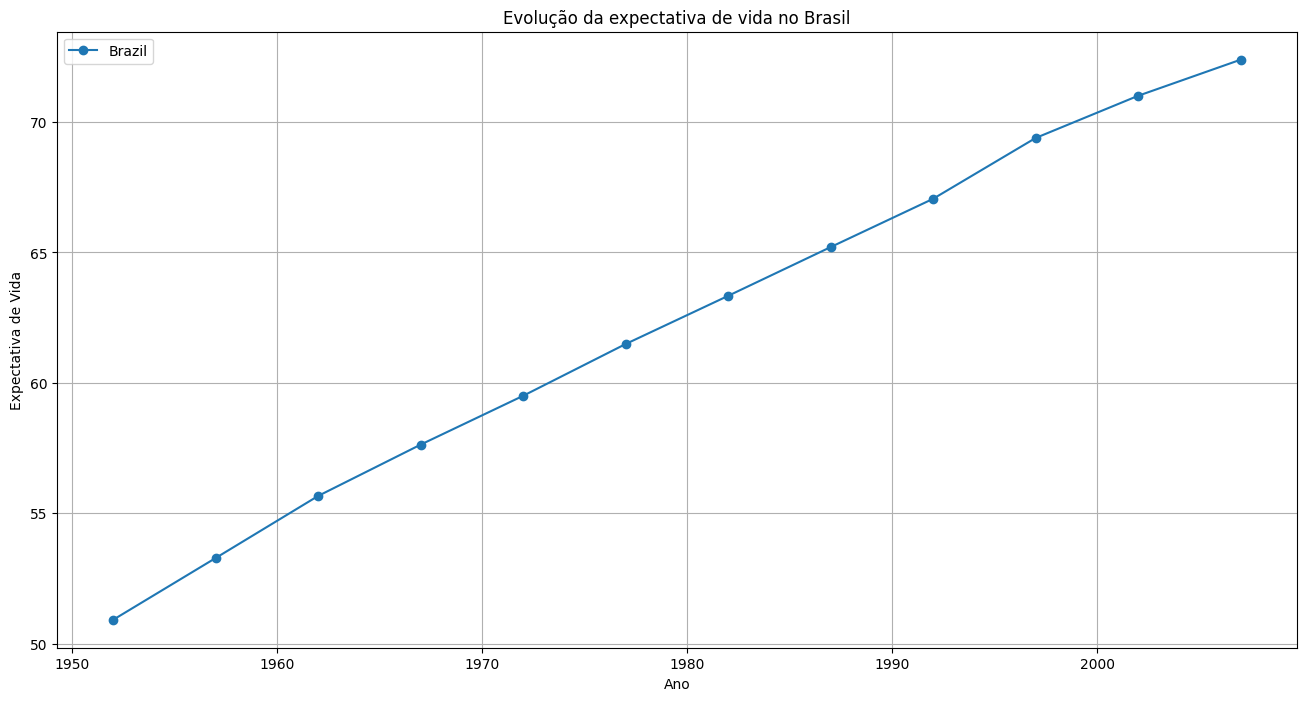

In [225]:
dfExpBrazil = df.query("country == 'Brazil'")
group = dfExpBrazil.groupby(['year', 'country'])['lifeExp'].mean().unstack()

plot_line_chart(group=group, 
                title = "Evolução da expectativa de vida no Brasil", 
                xLabel = "Ano", 
                yLabel = "Expectativa de Vida",
                showGrid = True,
                marker='o',
                xSize=16,
                ySize=8
                )

<b>Interpretação: </b> A evolução da Expectativa de vida no Brazil evoluiu em uma reta crescente, iniciando em 1950 com aproximadamente 51 anos e terminando a pesquisa em 2007 com 72 anos.<br><br>


<h3><b>8. Evolução do PIB per capita no Brasil</b></h3>

<b>Tipo:</b><br>
<b>Objetivo:</b><br>
<b>Justificativa:</b><br>

In [226]:
df.head(10)


,country,year,pop,continent,lifeExp,gdpPercap,decade
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,1950
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,1950
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,1960
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,1960
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,1970
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360,1970
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439,1980
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945,1980
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395,1990
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351,1990


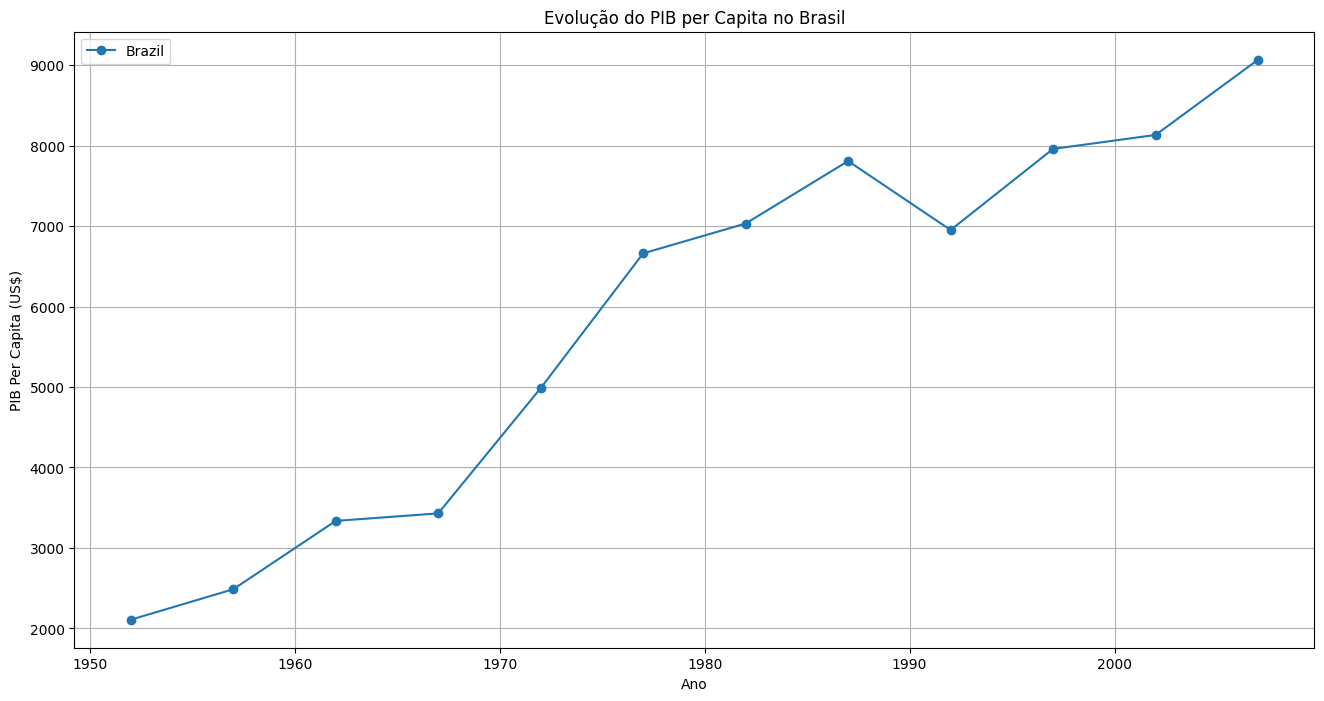

In [227]:
dfExpBrazil = df.query("country == 'Brazil'")
group = dfExpBrazil.groupby(['year', 'country'])['gdpPercap'].mean().unstack()

plot_line_chart(group=group, 
                title = "Evolução do PIB per Capita no Brasil", 
                xLabel = "Ano", 
                yLabel = "PIB Per Capita (US$)",
                showGrid = True,
                marker='o',
                xSize=16,
                ySize=8
                )


<h3><b>9. Identificar países com valores extremamente altos ou baixos de PIB Per Capita em cada década</b></h3>

<b>Tipo:</b> Gráfico de Dispersão<br>
<b>Objetivo:</b><br>
<b>Justificativa:</b><br>

In [228]:
fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', title='Relação entre PIB per capita e Expectativa de Vida')
fig.show()


<h3><b>10. Análise da desigualdade entre países</b></h3>

<b>Tipo:</b><br>
<b>Objetivo:</b><br>
<b>Justificativa:</b><br>

In [229]:
fig = px.scatter(df, x='gdpPercap', y='lifeExp', animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_y=[25,90], title="Análise da Desigualdade Entre Países")
fig.show()


<h3><b>11. Análise de países do crescimento per Capita do Paises ao Longo dos Anos</b></h3>

<b>Tipo:</b><br>
<b>Objetivo:</b><br>
<b>Justificativa:</b><br>

In [230]:
fig = px.bar(
    df,
    y='country',
    x='gdpPercap',
    color='continent',
    animation_frame='year',
    orientation='h',  # barras horizontais
    title='PIB per Capita por País (1952–2007)',
    labels={'gdpPercap': 'PIB per Capita (US$)', 'country': 'País'},
    width=1200,
    height=1000
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()



<h3><b>12. Gráfico/Tabela de Correlações</b></h3>

<b>Tipo:</b> Tabela<br>
<b>Objetivo:</b> A tabela de correlação tem como principal finalidade quantificar o grau de associação entre variáveis numéricas. Ela permite identificar padrões, dependências e relações que podem ser exploradas para análises mais profundas ou tomadas de decisão<br>
<b>Justificativa:</b> A tabela de correlação permite identificar relações estatísticas entre variáveis numéricas, como PIB per capita, expectativa de vida e população. Ela ajuda a revelar padrões, dependências e anomalias que orientam a análise e apoiam decisões baseadas em dados.<br>

In [231]:
df_correcao = df[['lifeExp', 'gdpPercap', 'pop']]

# Calcula a matriz de correlação
correlacoes = df_correcao.corr()
print(correlacoes)



            lifeExp  gdpPercap       pop
lifeExp    1.000000   0.583706  0.064955
gdpPercap  0.583706   1.000000 -0.025600
pop        0.064955  -0.025600  1.000000


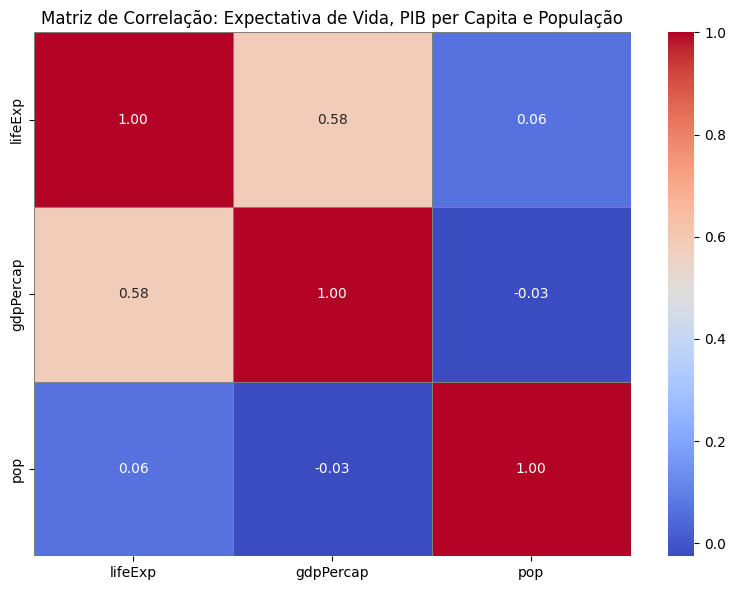

In [232]:
correlation_matrix = df_correcao.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Matriz de Correlação: Expectativa de Vida, PIB per Capita e População')
plt.tight_layout()


<b>Interpretação: </b><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;lifeExp vs gdpPercap:</b> Correlação positiva moderada (~0.58), indicando que países mais ricos tendem a ter maior expectativa de vida<br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pop vs lifeExp/gdpPercap:</b>Correlação fraca, sugerindo que o tamanho da população não está diretamente ligado à riqueza ou longevidade<br>
<br><br>


<h3><b>13. Tabela de Anomalias: Expectativa de Vida Alta com PIB per Capita Baixo</b></h3>

<b>Tipo:</b> Tabela<br>
<b>Objetivo:</b> Identificar paises que possuem indices que não seguem tendencias mundiais no que tange a Expectativa de Vida e Produto Interno Bruto Per Capita<br>
<b>Justificativa:</b> A tabela foi escolhida para destacar países que desafiam a relação esperada entre renda e longevidade, mostrando que é possível alcançar alta expectativa de vida mesmo com baixo PIB per capita. Isso evidencia a importância de políticas sociais eficazes além do fator econômico. <br>

In [249]:
# Identifying countries with high life expectancy and low GDP per capita
import pandas as pd
import plotly.express as px

# Carrega o dataset
df = px.data.gapminder()

# Calcula médias globais
media_vida = df['lifeExp'].mean()
media_pib = df['gdpPercap'].mean()

# Filtra países com expectativa de vida alta e PIB baixo
anomalia_vida_alta_pib_baixo = df[
    (df['lifeExp'] > media_vida) &
    (df['gdpPercap'] < media_pib) &
    (df['year'] == 2007)
][['year', 'country', 'continent', 'lifeExp', 'gdpPercap']]

# Exibe apenas os casos de anomalia
display(anomalia_vida_alta_pib_baixo.sort_values(by='year').head(50).sort_values(by='gdpPercap', ascending=True))


,year,country,continent,lifeExp,gdpPercap
1055,2007,Myanmar,Asia,62.069,944.000000
323,2007,Comoros,Africa,65.152,986.147879
1079,2007,Nepal,Asia,63.785,1091.359778
647,2007,Haiti,Americas,60.916,1201.637154
587,2007,Ghana,Africa,60.022,1327.608910
107,2007,Bangladesh,Asia,64.062,1391.253792
839,2007,"Korea, Dem. Rep.",Asia,67.297,1593.065480
1307,2007,Sao Tome and Principe,Africa,65.528,1598.435089
1331,2007,Senegal,Africa,63.062,1712.472136
227,2007,Cambodia,Asia,59.723,1713.778686


<b>Interpretação: </b><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Alguns países, como Sri Lanka, Honduras e Nicarágua, apresentam expectativa de vida acima da média global, mesmo com PIB per capita abaixo da média. Isso indica que boas condições de saúde e educação podem existir mesmo em economias menos desenvolvidas, desafiando a ideia de que riqueza é o principal fator para longevidade.



<br><br>


<h3><b>14. Tabela de Anomalias: PIB per Capita Alto com Expectativa de Vida Baixa</b></h3>

<b>Tipo:</b> Tabela<br>
<b>Objetivo:</b> Identificar paises que possuem indices que não seguem tendencias mundiais no que tange a Expectativa de Vida e Produto Interno Bruto Per Capita Baixo<br>
<b>Justificativa:</b> A tabela tabela foi escolhida para mostrar que riqueza econômica não garante qualidade de vida. Ela evidencia casos em que o alto PIB per capita não se traduz em longevidade, revelando falhas sociais, desigualdade ou baixa eficiência em políticas públicas <br>

In [252]:
anomalia_pib_alto_vida_baixa = df[
    (df['gdpPercap'] > media_pib) &
    (df['lifeExp'] < media_vida) &
    (df['year'] == 2007)
][['year', 'country', 'continent', 'lifeExp', 'gdpPercap']]

print("PIB Alto com Expectativa de Vida Baixa:")
display(anomalia_pib_alto_vida_baixa)

PIB Alto com Expectativa de Vida Baixa:


,year,country,continent,lifeExp,gdpPercap
167,2007,Botswana,Africa,50.728,12569.851770
491,2007,Equatorial Guinea,Africa,51.579,12154.089750
551,2007,Gabon,Africa,56.735,13206.484520
1415,2007,South Africa,Africa,49.339,9269.657808


<b>Interpretação: </b><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A tabela mostra países que possuem PIB per capita acima da média global, mas expectativa de vida abaixo da média. Isso indica que a riqueza não está sendo convertida em qualidade de vida, possivelmente por desigualdade social, baixa cobertura de saúde ou instabilidade política.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Casos como Gabão e Botswana indicam que a riqueza não garante qualidade de vida.



<br><br>


<h3><b>15. Tabela de Anomalias: População Alta com PIB per Capita Baixo</b></h3>

<b>Tipo:</b> Tabela<br>
<b>Objetivo:</b> Mostrar países com população alta e PIB per capita baixo, evidenciando o desafio de distribuir recursos de forma eficiente. <br>
<b>Justificativa:</b> Essa tabela foi escolhida para mostrar como países com grandes populações enfrentam desafios econômicos, já que o PIB per capita baixo indica dificuldade em distribuir recursos de forma eficiente.<br>

In [253]:
media_pop = df['pop'].mean()

anomalia_pop_alta_pib_baixo = df[
    (df['pop'] > media_pop) &
    (df['gdpPercap'] < media_pib) &
    (df['year'] == 2007)
][['year', 'country', 'continent', 'pop', 'gdpPercap']]

print("População Alta com PIB Baixo:")
display((anomalia_pop_alta_pib_baixo))


População Alta com PIB Baixo:


,year,country,continent,pop,gdpPercap
11,2007,Afghanistan,Asia,31889923,974.580338
35,2007,Algeria,Africa,33333216,6223.367465
107,2007,Bangladesh,Asia,150448339,1391.253792
299,2007,China,Asia,1318683096,4959.114854
311,2007,Colombia,Americas,44227550,7006.580419
335,2007,"Congo, Dem. Rep.",Africa,64606759,277.551859
467,2007,Egypt,Africa,80264543,5581.180998
515,2007,Ethiopia,Africa,76511887,690.805576
707,2007,India,Asia,1110396331,2452.210407
719,2007,Indonesia,Asia,223547000,3540.651564


<b>Interpretação: </b><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A tabela mostra países com população acima da média global, mas PIB per capita abaixo da média. Isso indica que esses países enfrentam o desafio de sustentar grandes populações com recursos econômicos limitados ou que não atigem grande parte da população.
<br><br>

----

# 4. Interpretação das Visualizações

<b> 1. Plotagem do Gráfico de Dispersão - Produto Interno Bruto Per Capita vs Expectativa de Vida Por Continente</b><br>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Asia:</b> Há grande dispersão nos dados apresentados, indicando grandes diferenças economicas e támbem sociais no continente. Pode-se observar que o aumento do PIB Per Capita está associado ao aumento da expectativa de vida entre paises.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa:</b> Apresenta maior concentração de pontos, indicando menor desigualdade entre paises. A expectitiva de vida é forte e estável (65 - 80 anos), demostrando que quase toda as nações apresentam alta renda e longevidade.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Africa:</b>  O continente apresenta uma disparidade muito maior de riquezas entre paises e consequentemente a expectativa de vida. Mesmo paises com maior PIB, a expectativa de vida é menor do que os demais continentes.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>América:</b> Possui uma tendência de crescimento semelhante a Europa, mas com maior variação. Há um disparidade muito grande de renda entre paises e consequentemente a expectativa de vida.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Oceania:</b> Embora poucos pontos de comparação, o continente apresenta valores elevados do PIB e expectativa de vida com relação aos demais continentes; além de possuir um crescimento continuo que pode apresentar um alto padrão de desenvolvimento e desigualdade.</p>
</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite comparação direta entre continentes<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Evidencia desigualdades regionais<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Mostra correlações visuais entre indicadores econômicos e de saúde <br>
</p>

</p>
<br><br>

<b>2 . Plotagem do Gráfico Linha: Comparação da expectativa de vida entre continentes</b><br>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Todos os continentes apresentaram aumento na expectativa de vida entre 1952 e 2007.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa e Oceania:</b> Mantêm os maiores índices, acima de 75 anos desde os anos 2000..</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>África:</b> Apresenta os menores valores e crescimento mais lento, refletindo desafios de desenvolvimento.
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Ásia e Américas:</b> Mostram evolução significativa, com a Ásia se aproximando das Américas em 2007.

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite visualizar tendências históricas de saúde pública.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Evidencia desigualdades regionais e avanços ao longo das décadas.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Apoia análises sobre impacto de políticas públicas, conflitos e desenvolvimento econômico.
<br>
</p>

</p>
<br><br>

<b>3. Plotagem do Gráfico (Mapa de Calor): Expectativa de vida por continente e década</b><br>


<p align="left"><b>>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Todos os continentes apresentaram aumento na expectativa de vida ao longo das décadas.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa e Oceania:</b> Mantêm os maiores índices, ultrapassando 75 anos em 2007..</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>África:</b> Crescimento mais lento e valores mais baixos, refletindo desafios estruturais persistentes.
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Ásia e Américas:</b> Evolução consistente, com a Ásia se aproximando das Américas em 2007.

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite visualizar padrões temporais e regionais de forma compacta.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Evidencia desigualdades históricas entre continentes.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ideal para análises comparativas e políticas públicas focadas em saúde global.
<br>
</p>

</p>
<br><br>
<b>4. Visualização Geográfica: Expectativa de Vida por Continente ao Longos do Anos </b><br>


<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Todos os continentes apresentaram aumento na expectativa de vida ao longo das décadas.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa e Oceania:</b> Mantêm os maiores índices, ultrapassando 71 anos em 1952 e 81 anos em 2007..</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>África:</b> Crescimento mais lento e valores mais baixos, refletindo desafios de desenvolvimento internos.
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Ásia e Américas:</b> Evolução consistente, com a Ásia se aproximando das Américas em 2007.

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite visualizar a evolução dos padrões temporais e regionais de forma compacta e animada<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Evidencia desigualdades históricas entre continentes.<br>.
<br>
</p>

</p>
<br>
<b>5. Plotagem do Gráfico (Scatter plot Multivariado): População Por Continente vs (Expectativa de Vida vs PIB Per Capita)</b><br>


<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Oceania</b> Poucos países, alto PIB per capita e expectativa de vida elevada — indica alto desenvolvimento.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Europa:</b> PIB alto e expectativa de vida alta, com número moderado de países — mostra estabilidade e equidade.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>America:</b> PIB e expectativa de vida medianos, mas com variação interna significativa.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Ásia:</b> Muitos países, PIB médio e expectativa de vida crescente — diversidade econômica e social.
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Ásia:</b> Maior número de países, menor PIB e expectativa de vida — desafios estruturais persistentes.

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite visualizar múltiplos indicadores simultaneamente<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Destaca desigualdades regionais e padrões de desenvolvimento<br>
<br>
</p>

</p>
<br>


<b>6. Scatter Geo com Animação: Paises Mais Populosos do Mundo</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Todos os continentes apresentaram aumento populacional ao longo dos anos.</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>India e China:</b> dominam com crescimento acelerado, ultrapassando 1 bilhão de habitantes cada em 2007. </p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Nigéria:</b> aparece com forte crescimento, indicando desafios futuros em infraestrutura e serviços públicos.
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Estados Unidos e Brasil:</b> também apresentam crescimento constante, com destaque para estabilidade nos EUA e aceleração no Brasil..

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite comparar diretamente o ritmo de crescimento demográfico entre os países mais relevantes<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Evidencia populacional históricas entre continentes.<br>.
<br>
</p>

</p>


<b>7. Evolução da expectativa de vida no Brasil</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Em 1952, a expectativa de vida no Brasil era de aproximadamente 50 anos, refletindo um contexto de infraestrutura limitada, alta mortalidade infantil e acesso restrito à saúde. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A partir da década de 1970, observa-se uma aceleração no crescimento, com saltos significativos nas décadas de 1980 e 1990 — período marcado por avanços em vacinação, saneamento básico e políticas públicas de saúde. <b>[Referencia https://www.gov.br/saude/pt-br/acesso-a-informacao/acoes-e-programas/pni]</b> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A curva é ascendente e contínua, sem quedas abruptas, o que indica resiliência demográfica mesmo diante de crises econômicas e políticas
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Em 2007, o país alcança uma expectativa de vida média próxima a 72 anos, evidenciando melhorias estruturais e sociais.<br>
</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Permite análise temporal detalhada de um único país. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ideal para avaliar o impacto de políticas públicas e mudanças socioeconômicas do pais.<br>
<br>

<br>
</p>

</p>


<b>8. Evolução do PIB per capita no Brasil</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>

<br>
</p>

</p>


<b>9. Identificar países com valores extremamente altos ou baixos de gdpPercap em cada década</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>

<br>
</p>

</p>


<b>10. Análise da desigualdade entre países</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>

<br>
</p>

</p>


<b>11. Análise de países do crescimento per Capita do Paises ao Longo dos Anos</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação do Gráfico]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>

<br>
</p>

</p>



<b>12. Gráfico/Tabela de Correlação</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação da Tabela]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>

<br>
</p>

</p>

<b>13. Tabela de Anomalias: Expectativa de Vida Alta com PIB per Capita Baixa</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação da Tabela]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A tabela destaca países que apresentam expectativa de vida acima da média global, mesmo com PIB per capita abaixo da média. Isso revela que fatores como políticas públicas de saúde, educação e saneamento básico podem garantir qualidade de vida elevada mesmo em contextos econômicos limitados. Exemplos como Sri Lanka, Honduras e Nicarágua mostram que desenvolvimento social não depende exclusivamente da riqueza.
</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Essa tabela foi escolhida para evidenciar anomalias positivas que desafiam a correlação esperada entre renda e longevidade. Ela permite identificar casos de eficiência social e exceções relevantes que enriquecem a análise, mostrando que o progresso humano pode ocorrer mesmo com restrições econômicas.


<br>

<br>
</p>

</p>





<b>14. Tabela de Anomalias: PIB per Capita Alto com Expectativa de Vida Baixa</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação da Tabela]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A tabela mostra países que possuem PIB per capita acima da média global, mas expectativa de vida abaixo da média. Isso indica que a riqueza não está sendo convertida em qualidade de vida, possivelmente por desigualdade social, baixa cobertura de saúde ou instabilidade política.
</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Essa tabela foi escolhida para mostrar que riqueza econômica não garante qualidade de vida. Ela evidencia casos em que o alto PIB per capita não se traduz em longevidade, revelando falhas sociais, desigualdade ou baixa eficiência em políticas públicas



<br>

<br>
</p>

</p>

<b>15. Tabela de Anomalias: População Alta com PIB per Capita Baixoa</b>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Interpretação da Tabela]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A tabela mostra países com população acima da média global, mas PIB per capita abaixo da média. Isso pode indicar que esses países enfrentam o desafio de sustentar grandes populações com recursos econômicos limitados, o que pode comprometer o acesso a serviços básicos, infraestrutura e qualidade de vida.

</p>

<p align="left"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Justificativa da Escolha]</b><p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Essa tabela foi escolhida para mostrar como países com grandes populações enfrentam desafios econômicos, já que o PIB per capita baixo indica dificuldade em distribuir recursos de forma eficiente



<br>

<br>
</p>

</p>

# 5. Síntese dos Principais Insights

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>[Padrões e Tendências]</b><br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Expectativa de vida aumentou consistentemente em todos os continentes entre 1952 e 2007, com destaque para Europa e Oceania, que ultrapassaram 75 anos em média.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;PIB per capita apresenta forte correlação com expectativa de vida, especialmente em países europeus e da Oceania.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Crescimento populacional foi exponencial, com destaque para Ásia e África. China e Índia ultrapassaram 1 bilhão de habitantes.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Desigualdade regional é evidente: África concentra os menores índices de PIB e expectativa de vida, mesmo com crescimento populacional acelerado.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>[Anomalias e Correlações]</b><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Expectativa de Vida Alta com PIB per Capita Baixo:</b> Países como Sri Lanka e Nicarágua mostram que é possível alcançar longevidade mesmo com recursos econômicos limitados. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>PIB per Capita Alto com Expectativa de Vida Baixa:</b>Casos como Gabão e Botswana indicam que a riqueza não garante qualidade de vida.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>População Alta com PIB per Capita Baixo:</b> Países como Índia enfrentam o desafio de sustentar grandes populações com poucos recursos por habitante. <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>[Aplicações Práticas]</b><br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Investimentos em saúde básica, saneamento e educação podem elevar a expectativa de vida independentemente do PIB.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Escrever mais
<br>

----

# 6 . Conclusão e Reflexão

Desafios Enfrentados<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tratar duplicações e inconsistências no dataset exigiu atenção. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Escolher visualizações que fossem informativas e acessíveis foi um processo iterativo.<br><br>

Aprendizado Obtido<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A análise reforçou a importância de visualizações bem construídas para revelar padrões ocultos.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Compreendi como indicadores socioeconômicos se inter-relacionam e como desigualdades persistem.<br><br>

Desenvolvimento de Habilidades<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Aprimorei habilidades em limpeza de dados, visualização e interpretação crítica.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ganhei maior autonomia para construir narrativas analíticas com base em evidências.<br>

